# Plotting diphthongs
First, we import some standard numeric and plotting libraries, and set some basic defaults to apply to any plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext rpy2.ipython
%matplotlib inline

plt.rc('figure', figsize=(16, 9))  # make plots wider
plt.rc('font', size=16)            # make text bigger

Since vowel plots are pretty specialized, let's write a reusable function that will put our axes on the top and right sides, and invert the axis directions.  We'll do this with a function called `garnish` that can be applied to any plot.

In [2]:
def garnish(ax):
    if not ax.xaxis_inverted():
        ax.invert_xaxis()
    if not ax.yaxis_inverted():
        ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()
    ax.set_xlabel('F2')
    ax.set_ylabel('F1')
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('right')
    return ax

Now let's load and examine our data:

In [3]:
formant_data = pd.read_csv('diphthongs.csv')
formant_data.head()

,filename,ipa,pct,time,formant,formant_value
0,hayed1_11.wav,eɪ,5%,0.347525,f1,403.945619
1,hayed1_11.wav,eɪ,5%,0.347525,f2,2505.496579
2,hayed1_11.wav,eɪ,10%,0.360383,f1,397.983350
3,hayed1_11.wav,eɪ,10%,0.360383,f2,2517.453601
4,hayed1_11.wav,eɪ,15%,0.373242,f1,389.090953


After loading the data, we notice that the `pct` column is strings. It would be easier if they were numbers (for sorting purposes), so let's convert them. Let's also reshape the data from "long format" (1 formant measurement per line) into "wide format" (1 record per line).  This has the side effect of dropping the `time` values (which we don't need anyway).  The resulting table will have "heirarchical indexes" on both the columns and rows, which will make it easy to select whole spans of rows or columns at a time.

In [4]:
formant_data['pct'] = formant_data['pct'].map(lambda x: int(x.strip('%')))
wide_data = pd.pivot_table(formant_data, index=['ipa', 'filename'], columns=['formant', 'pct'], values='formant_value')
wide_data.head(10)

formant                    f1                                                  \
pct                        5           10          15          20          25   
ipa filename                                                                    
aɪ  hide1_11.wav   517.291056  579.144176  566.629754  546.816171  500.440543   
    hide2_11.wav   468.445111  483.179898  619.834644  412.580341  327.058179   
    hide3_11.wav   520.232684  516.986868  479.703811  356.136495  379.647057   
    hide4_11.wav   741.898119  551.438448  531.072918  583.483004  586.600982   
aʊ  how_d1_11.wav  448.494396  433.668150  507.592561  844.047058  841.254111   
    how_d2_11.wav  508.696708  917.075188  951.090211  928.602451  728.552740   
    how_d3_11.wav  705.148815  700.124664  922.806191  766.292926  698.874324   
    how_d4_11.wav  422.936093  551.314402  828.426851  809.935814  808.469716   
eɪ  hayed1_11.wav  403.945619  397.983350  389.090953  376.904271  362.909561   
    hayed2_11.wav  425.605514  458.736635  457.586487  442.264064  427.527859   

formant                                                                        \
pct                        30          35          40          45          50   
ipa filename                                                                    
aɪ  hide1_11.wav   496.454733  559.297198  662.120041  708.971540  745.842454   
    hide2_11.wav   507.246241  702.274713  820.151649  818.978276  846.404588   
    hide3_11.wav   370.736637  414.148886  366.885919  275.205143  820.193770   
    hide4_11.wav   602.206145  659.929152  812.856773  774.742770  768.855097   
aʊ  how_d1_11.wav  572.586448  536.172050  482.349970  515.084420  493.800800   
    how_d2_11.wav  695.961274  660.247064  630.822479  589.895572  563.937963   
    how_d3_11.wav  736.866227  721.836646  824.620708  709.578379  618.891835   
    how_d4_11.wav  867.724001  863.745875  795.197872  753.534688  692.923874   
eɪ  hayed1_11.wav  377.520106  382.857223  392.963038  387.426481  388.236606   
    hayed2_11.wav  418.240984  407.123933  392.877027  391.606242  394.240438   

formant               ...                f2                            \
pct                   ...                50           55           60   
ipa filename          ...                                               
aɪ  hide1_11.wav      ...       1395.684247  1448.930205  1653.833112   
    hide2_11.wav      ...       1380.243605  1593.151129  1713.414052   
    hide3_11.wav      ...       1295.036645  1531.507995  1398.029238   
    hide4_11.wav      ...       1250.797496  1347.333985  1387.407559   
aʊ  how_d1_11.wav     ...       1179.717058  1149.629116  1129.017964   
    how_d2_11.wav     ...       1218.298091  1169.359284  1162.888872   
    how_d3_11.wav     ...       1189.874119  1147.428424  1193.221453   
    how_d4_11.wav     ...       1268.007708  1238.748970  1234.148302   
eɪ  hayed1_11.wav     ...       2723.056759  2742.847270  2741.687072   
    hayed2_11.wav     ...       2689.237914  2667.597345  2671.495348   

formant                                                                \
pct                         65           70           75           80   
ipa filename                                                            
aɪ  hide1_11.wav   1917.324192  2077.900033  2336.049025  2266.189754   
    hide2_11.wav   1807.333145  2008.876655  2063.156816  2190.977895   
    hide3_11.wav   1728.115871  1784.212770  2042.123601  2443.626831   
    hide4_11.wav   1520.812042  1733.656876  1883.927097  2001.604029   
aʊ  how_d1_11.wav  1114.483875  1112.178329  1129.334214  1145.136300   
    how_d2_11.wav  1168.639246  1170.446590  1203.615060  1227.963620   
    how_d3_11.wav  1154.443817  1101.639431  1103.958305  1148.299139   
    how_d4_11.wav  1182.800724  1174.451321  1189.591438  1211.666130   
eɪ  hayed1_11.wav  2759.598416  2770.637674  2773.340612  2752.759758   
    hayed2_11.wav  2690.445571  2678.959563  2661.502362  2661.376

it will be useful for later to have the IPA labels in both the table index *and* in their own column, so let's do that now. While we're at it, let's remove the heirarchical index names (`formant`, `pct`, etc), so our software doesn't get confused between the `ipa` column and the `ipa` sequence of row labels. Finally, for obscure reasons, indexing works best if the top level of heirarchical column names be in alphabetic order, so we'll do that now too.

In [5]:
idx = wide_data.index
wide_data.reset_index(0, inplace=True, col_level=0)
wide_data.index = idx
wide_data.columns.rename(['', ''], inplace=True)
wide_data.index.rename(['', ''], inplace=True)
wide_data = wide_data[['f1', 'f2', 'ipa']]  # sort top-level
wide_data.head()

f1                                                  \
                           5          10          15          20          25   
                                                                               
aɪ hide1_11.wav   517.291056  579.144176  566.629754  546.816171  500.440543   
   hide2_11.wav   468.445111  483.179898  619.834644  412.580341  327.058179   
   hide3_11.wav   520.232684  516.986868  479.703811  356.136495  379.647057   
   hide4_11.wav   741.898119  551.438448  531.072918  583.483004  586.600982   
aʊ how_d1_11.wav  448.494396  433.668150  507.592561  844.047058  841.254111   

                                                                              \
                          30          35          40          45          50   
                                                                               
aɪ hide1_11.wav   496.454733  559.297198  662.120041  708.971540  745.842454   
   hide2_11.wav   507.246241  702.274713  820.151649  818.978276  846.404588   
   hide3_11.wav   370.736637  414.148886  366.885919  275.205143  820.193770   
   hide4_11.wav   602.206145  659.929152  812.856773  774.742770  768.855097   
aʊ how_d1_11.wav  572.586448  536.172050  482.349970  515.084420  493.800800   

                 ...           f2                                         \
                 ...           55           60           65           70   
                 ...                                                       
aɪ hide1_11.wav  ...  1448.930205  1653.833112  1917.324192  2077.900033   
   hide2_11.wav  ...  1593.151129  1713.414052  1807.333145  2008.876655   
   hide3_11.wav  ...  1531.507995  1398.029238  1728.115871  1784.212770   
   hide4_11.wav  ...  1347.333985  1387.407559  1520.812042  1733.656876   
aʊ how_d1_11.wav ...  1149.629116  1129.017964  1114.483875  1112.178329   

                                                                      \
                           75           80           85           90   
                                                                       
aɪ hide1_11.wav   2336.049025  2266.189754  2319.836240  2353.126611   
   hide2_11.wav   2063.156816  2190.977895  2241.757909  2318.264974   
   hide3_11.wav   2042.123601  2443.626831  2394.500387  2379.894906   
   hide4_11.wav   1883.927097  2001.604029  2134.651565  2159.703584   
aʊ how_d1_11.wav  1129.334214  1145.136300  1237.990733  1260.039464   

                              ipa  
                           95      
                                   
aɪ hide1_11.wav   2281.375744  aɪ  
   hide2_11.wav   2317.176442  aɪ  
   hide3_11.wav   2335.150924  aɪ  
   hide4_11.wav   2151.333900  aɪ  
aʊ how_d1_11.wav  1376.676678  aʊ  

[5 rows x 39 columns]

In [6]:
# example of heirarchical indexing:
wide_data.loc[['aʊ', 'oʊ'], [('ipa', ''), ('f1', 50), ('f2', 50)]]

ipa          f1           f2
                              50           50
                                             
aʊ how_d1_11.wav  aʊ  493.800800  1179.717058
   how_d2_11.wav  aʊ  563.937963  1218.298091
   how_d3_11.wav  aʊ  618.891835  1189.874119
   how_d4_11.wav  aʊ  692.923874  1268.007708
oʊ hoed1_11.wav   oʊ  381.007609  1113.047732
   hoed2_11.wav   oʊ  512.602356  1159.783072
   hoed3_11.wav   oʊ  447.865921  1107.444704
   hoed4_11.wav   oʊ  380.115397  1005.606693

Let's write a reusable function that will plot the vowels' IPA symbols instead of points.

In [7]:
def plot_vowels(f1, f2, vowel, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(f2, f1, alpha=0)  # plot pts invisibly, to set up correct dimensions
    for x, y, s in zip(f2, f1, vowel):
        ax.text(x, y, s, ha='center', va='center')
    ax = garnish(ax)
    return ax

For starters, let's plot just the midpoint of each vowel, like we would do with monophthongs:

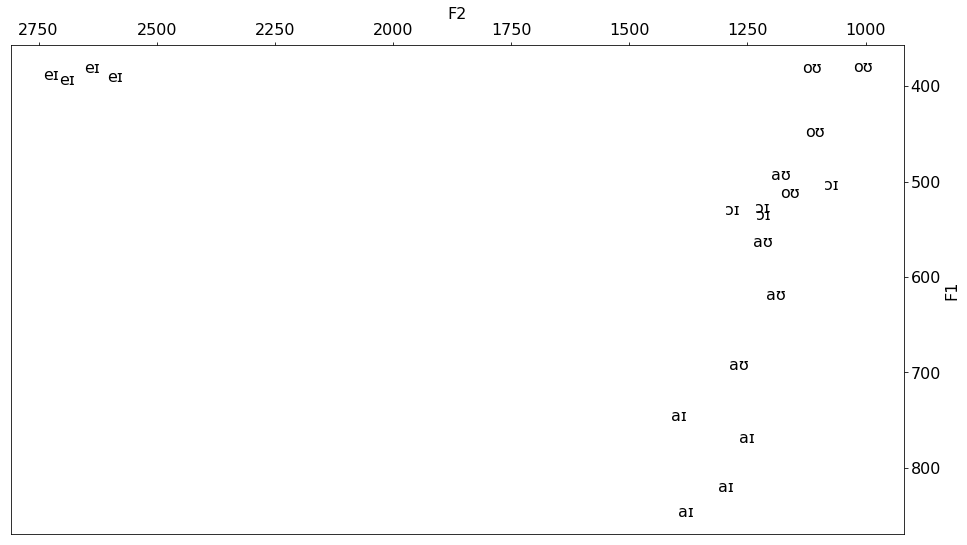

In [8]:
ax = plot_vowels(wide_data[('f1', 50)], wide_data[('f2', 50)], wide_data['ipa'])

Now let's pick 2 points. We could pick the `20%` and `80%` points, or `30%`/`70%`, or `10%`/`90%`... which is best? Also, we'll want to connect the start- and end-points with a line, so we'll need to update our plotting function.

In [9]:
def plot_diphthongs(f1, f2, vowel, ax=None):
    '''f1 and f2 should be matrices, where each column is one diphthong, with later timepoints at higher row numbers'''
    f1 = np.array(f1)
    f2 = np.array(f2)
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(f2, f1)
    ax = plot_vowels(f1[0], f2[0], vowel, ax=ax)
    ax = garnish(ax)
    return ax

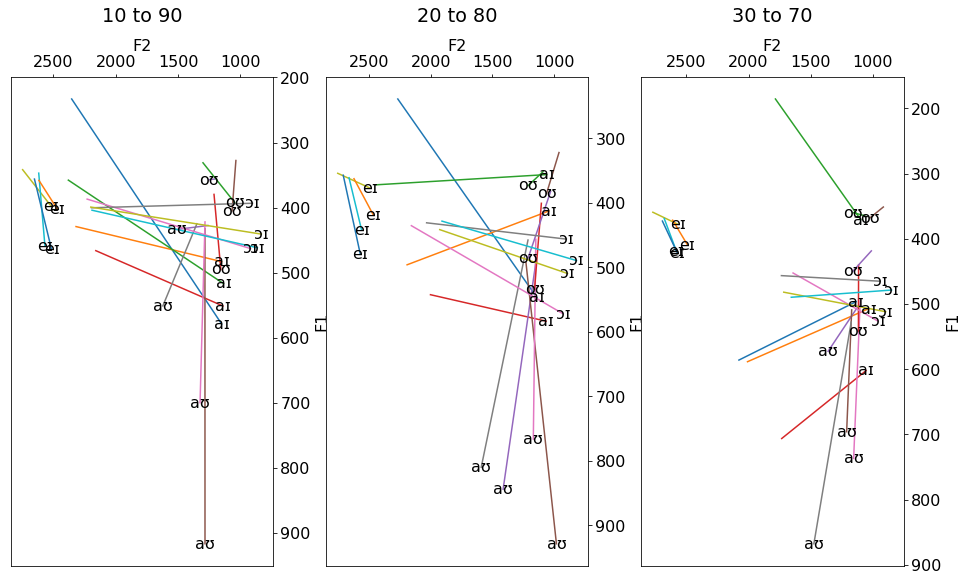

In [10]:
pairs = [(10, 90), (20, 80), (30, 70)]

fig, axs = plt.subplots(1, 3)
for pair, ax in zip(pairs, axs):
    f1 = wide_data[[('f1', pair[0]), ('f1', pair[1])]].T
    f2 = wide_data[[('f2', pair[0]), ('f2', pair[1])]].T
    ax = plot_diphthongs(f1, f2, wide_data['ipa'], ax=ax)
    ax.set_title('{} to {}'.format(*pair), y=1.1)

A bit hard to see what's going on...  maybe we should pick just one vowel, and draw various spans on the same plot?

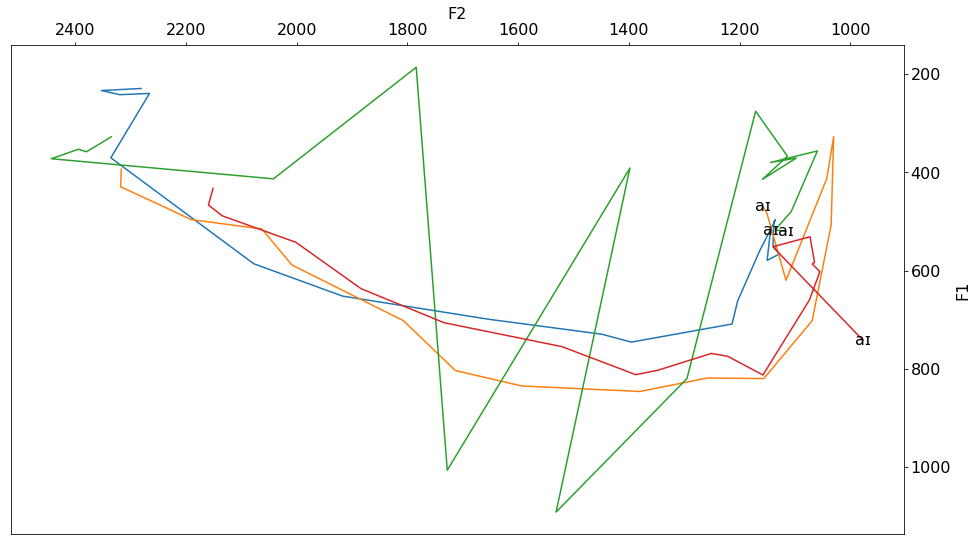

In [11]:
f1 = wide_data.loc['aɪ', 'f1'].T
f2 = wide_data.loc['aɪ', 'f2'].T
plot_diphthongs(f1, f2, wide_data['ipa']);

Now let's add the full time series for all of them:

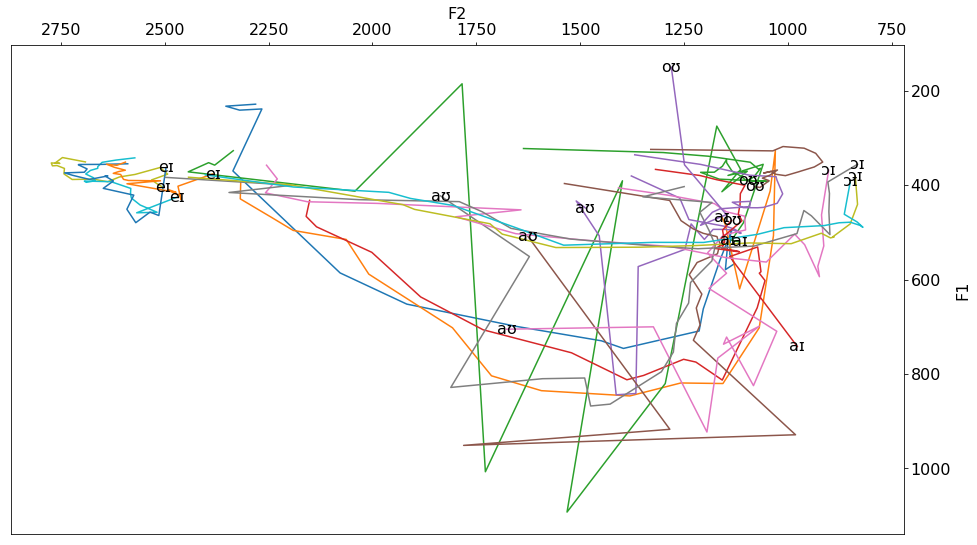

In [12]:
fig, ax = plt.subplots()
f1 = wide_data['f1'].T
f2 = wide_data['f2'].T
ax = plot_diphthongs(f1, f2, wide_data['ipa'], ax=ax)

Messy...  let's try smoothing with a moving average of length 5.

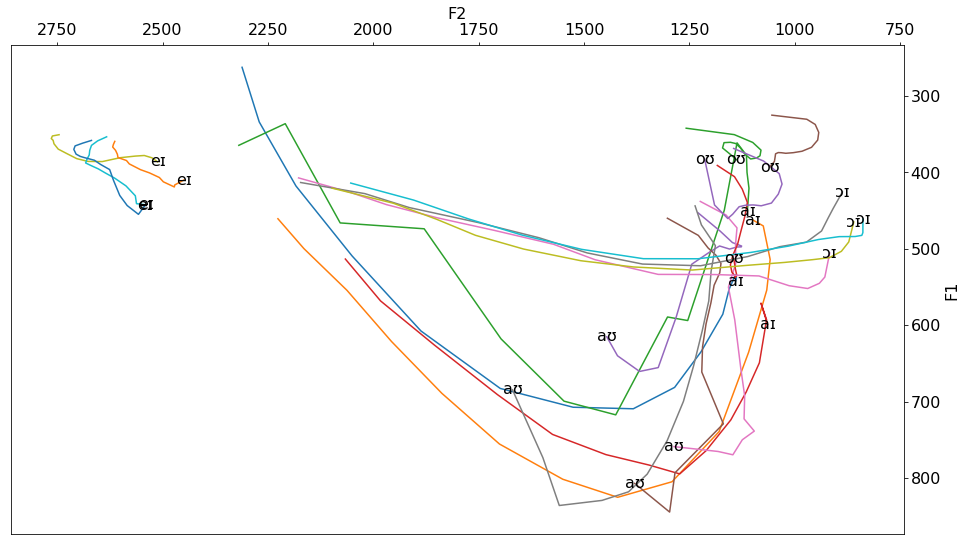

In [13]:
rolled = wide_data[['f1', 'f2']].rolling(axis=1, window=5, min_periods=5, center=True, win_type='boxcar').mean()
rolled['ipa'] = wide_data['ipa']
nan_columns = [(f, p) for p in (5, 10, 90, 95) for f in ('f1', 'f2')]
rolled.drop(nan_columns, axis=1, inplace=True)
plot_diphthongs(rolled['f1'].T, rolled['f2'].T, rolled['ipa']);